<img src="../files/misc/logo.gif" width=300/>
<h1 style="color:#872325">Artificial Neural Networks</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, seed

import sys
sys.path.append("../files")
import nn_utils

In [2]:
%config InlineBackend.figure_format = "retina"

![ANN](https://www.kdnuggets.com/wp-content/uploads/deep-neural-network.jpg)

* Inspirado originalmente por la manera en la cuál funciona nuestro cerebro
    - Hoy en día esta relación es equivalente a la de un pájaro con un avión
    

* Ideales para atacar **grandes** y **complejos** problemas de *Machine Learning*
    - Clasificación de miles de millones de imágenenes (Google Images)
    - Sistemas de recomendación (Amazon, Spotify, YouTube)
    - Traducción (Google Translate)

* Desde 1940
* La explosión en los últimos años ha sido gracias a:
    - vasta información disponible
    - Incremento de poder computacional
        - *Cloud Computing* (AWS, GCP, Ms Azure)
        - Mejor Hardware: GPUs, TPUs
    - [Noticias](https://trends.google.com/trends/explore/TIMESERIES/1582557000?hl=en-US&tz=360&date=all&q=deep+learning&sni=3)

### La historia de Deep Learning

* 1943: Neural Networks
* 1957-1963: Perceptrón
* 1970-1986: Backpropagation, RNNs, RBMs
* 1979-1998: CNN, LSTM, MNIST dataset
* 2006: "Deep Learning"
* 2014: GANs
* 2016-2017: AlphaGo, Alpha Zero
* 2017-: Transformers

Fuente: [Deep Learning, Lex Fridman](https://lexfridman.com/files/slides/2020_01_06_deep_learning_state_of_the_art.pdf)

### Projectos con Deep Learning

* https://talktotransformer.com/
* https://teachablemachine.withgoogle.com/train
* https://tenso.rs/demos/fast-neural-style/

## Funciones de activación

Una red neuronal de una capa está dada por: 
$$
    \hat y = {\bf w}^{(2)} f^{(1)}({\bf w}^{(1)}x)
$$

In [3]:
x = np.linspace(-5, 5, 500)

Existen diferentes funciones _comúnes_ de activación

$$
    \sigma(x) = \frac{1}{1 + \exp(-x)}
$$

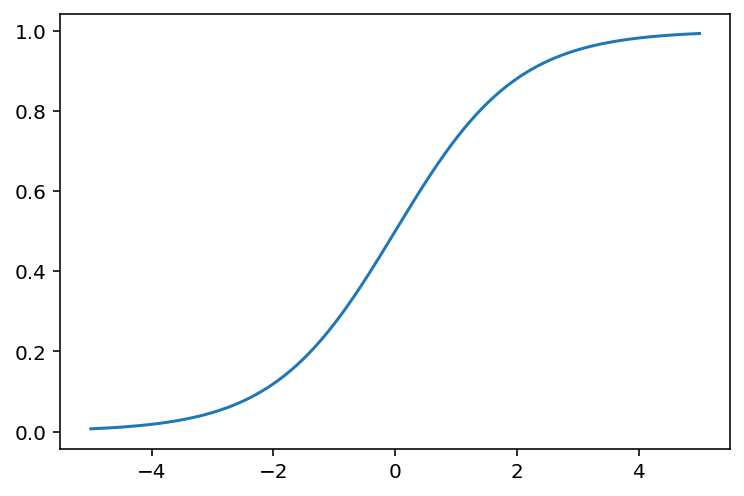

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid(x))

$$
    \tanh(x) = \frac{\exp(x) - \exp(-x)}{\exp(x) + \exp(-x)}
$$

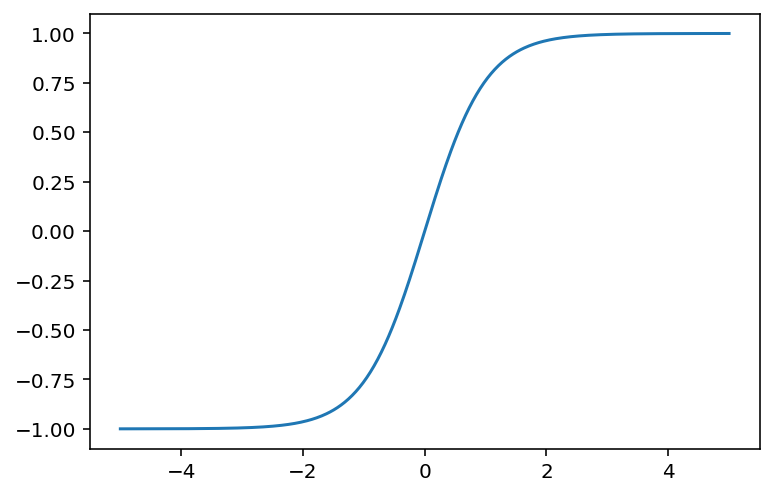

In [5]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


plt.plot(x, tanh(x))

$$
    \text{ReLU}(x) = \max(0, x)
$$

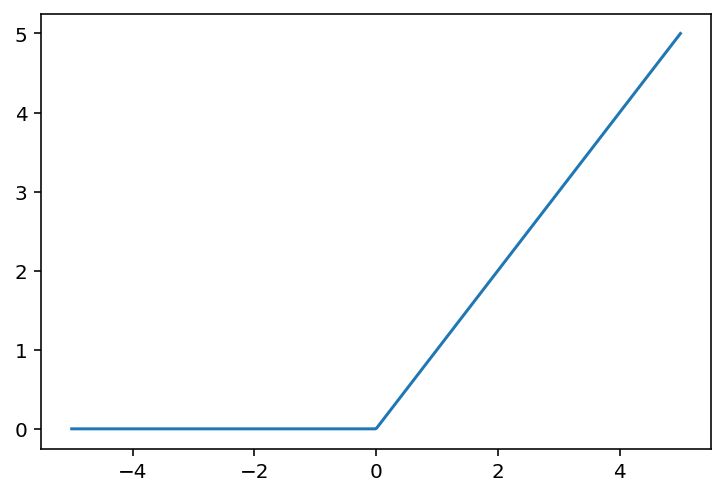

In [6]:
def ReLU(x):
    return np.maximum(0, x)


plt.plot(x, ReLU(x))

## Superficie de costos

In [7]:
def nnet(x, W1, W2): return W2 @ sigmoid(W1 @ x)

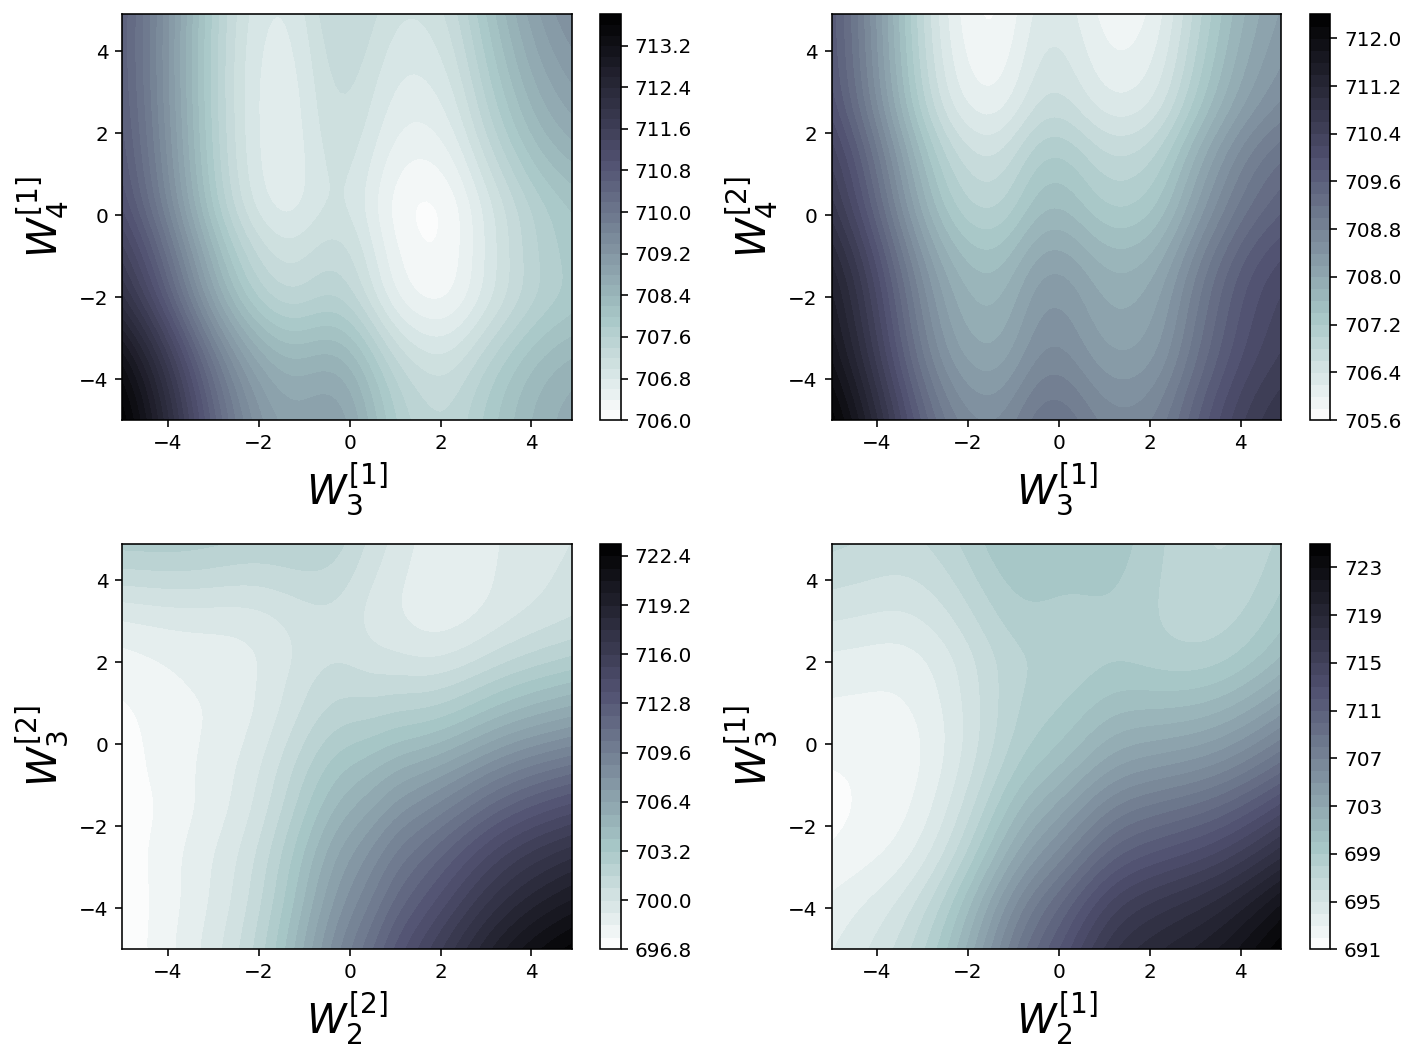

In [8]:
seed(31415)

# Creating the samples
nobs = 1000
x = randn(10, nobs)
y = randn(1, nobs)

# Initializing the weights
w1 = randn(4, 10)
w2 = randn(1, 4)

cuts = [((2,0), (3,0)),
        ((2,0), (3,1)),
        ((1,1), (2,1)),
        ((1,0), (2,0))]

fig = plt.figure(figsize=(10,7.5))
for ix, cut in enumerate(cuts):
    ax = fig.add_subplot(2, 2, ix + 1)
    p1, p2, J = nn_utils.loss_surface((x, w1, w2), (w1, w1), cut, nnet, y)
    plt.contourf(p1, p2, J, 40, cmap="bone_r")
    plt.colorbar()
    (cut1_ix, cut1_layer), (cut2_ix, cut2_layer) = cut
    xlab = "$W^{[" + f"{cut1_layer + 1}" + "]}" + f"_{cut1_ix + 1}$"
    ylab = "$W^{[" + f"{cut2_layer + 1}" + "]}" + f"_{cut2_ix + 1}$"
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
plt.tight_layout()

## Entrenando una primera red neuronal

### [Tensorflow Playground](http://playground.tensorflow.org/)
![](https://playground.tensorflow.org/preview.png)